In [1]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")

/tmp/ipython-input-1755532821.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [3]:
data['Next_Close'] = data['Close'].shift(-1)

In [4]:

# Drop the last row with NaN target
data = data.dropna()

In [5]:

# Features: Open, High, Low, Volume
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 903.50


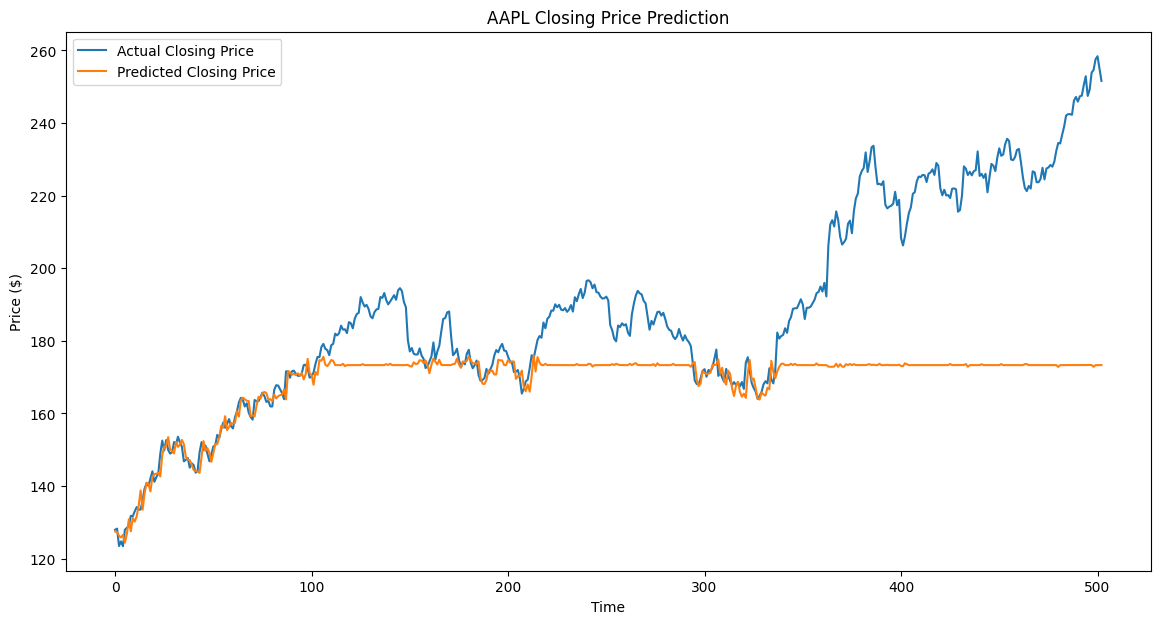

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Closing Price')
plt.plot(y_pred, label='Predicted Closing Price')
plt.title(f'{ticker} Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [11]:
ticker = "TSLA"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")


/tmp/ipython-input-2095022072.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [12]:

# Next day's close
data['Next_Close'] = data['Close'].shift(-1)
data = data.dropna()

# Features
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

In [13]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [14]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 79.47


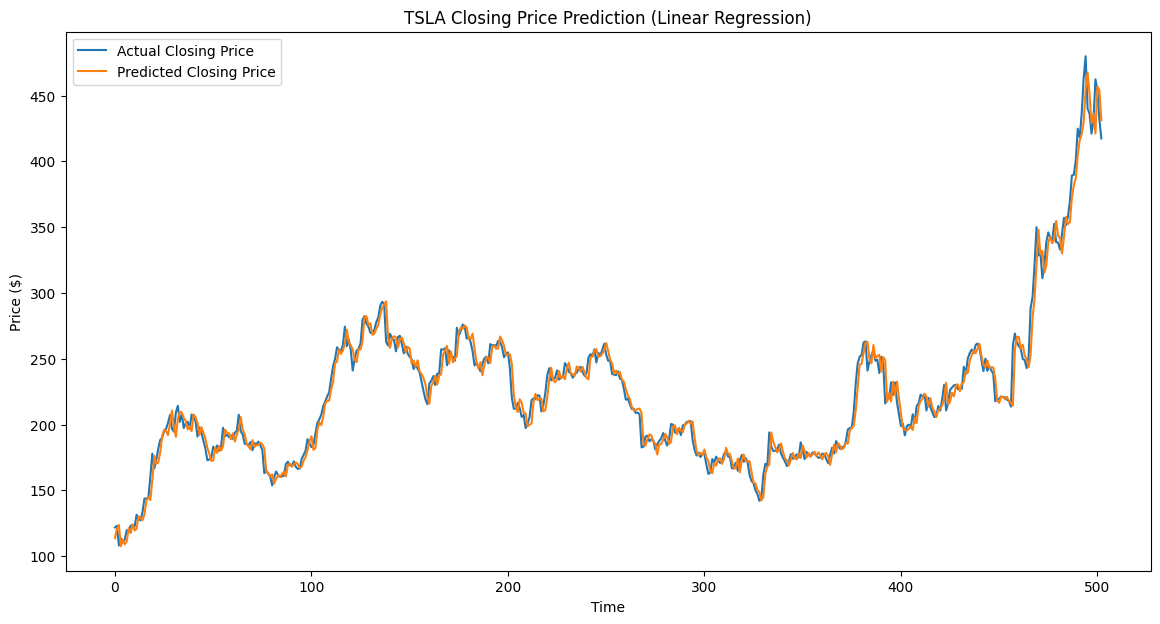

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Closing Price')
plt.plot(y_pred, label='Predicted Closing Price')
plt.title(f'{ticker} Closing Price Prediction (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.show()
